In [17]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [18]:
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(linewidth=200)

In [20]:
import lnPi
reload(lnPi)

<module 'lnPi' from '/Users/wpk/Documents/python/lnPi/__init__.pyc'>

In [21]:
lnpi_ref = lnPi.lnPi_phases.from_file('./nahs_asym_mix.11_11_03.r1.lnpi_o.dat',mu=[0.5,0.5],fill_value=np.nan,ZeroMax=True,num_phases_max=2,beta=1.0,
                                     build_kwargs=dict(num_phases_max=5),
                                      ftag_phases=lnPi.tag_phases_binary) 

In [22]:
def get_spin_bin(ref,mu_in,x,spin_kwargs=None,bin_kwargs=None):
    
    if spin_kwargs is None: spin_kwargs={}
    if bin_kwargs is None: bin_kwargs = {}
    
    #initial estimate
    C = lnPi.lnPi_collection.from_mu(ref,mu_in,x)
    
    C.get_spinodals(**spin_kwargs)
    C.get_binodals(**bin_kwargs)
    
    return C
            

In [23]:
import tqdm

In [24]:
L=[]
for mu2 in tqdm.tqdm(np.arange(-4,4,0.2),leave=True):
    try:
        C = get_spin_bin(lnpi_ref,[None,mu2],np.linspace(-10.,10.,2),spin_kwargs=dict(nmax=40,ntry=40))
    except:
        print 'error at mu2',mu2
        break
    L.append(C)

100%|██████████| 40/40 [00:50<00:00,  0.79it/s]


# write hdf

In [26]:
LL = L

In [27]:
import h5py
fname = 'conf_asym.h5'
!rm $fname
F = h5py.File(fname)

lnpi_ref.to_hdf(F,'lnpi_ref',overwrite=True)
collection_list = []
for i,x in enumerate(LL):
    key = 'collection_%i'%i
    collection_list.append(key)
    x.to_hdf(F,'collection_%i'%i,ref=None,overwrite=True)

F.create_dataset('collection_list',data=np.array(collection_list))

F.close()

rm: conf_asym.h5: No such file or directory


In [28]:
!ls -lh $fname

-rw-r--r--  1 wpk  wpk    12M Dec 30 21:43 conf_asym.h5


# read hdf

In [29]:
#load file to lst
fname = 'conf_asym.h5'
with h5py.File(fname,'r') as f:
    ref = lnPi.lnPi_phases.from_hdf(f,'lnpi_ref')
    lst = []
    for k in f['collection_list']:
        lst.append(lnPi.lnPi_collection.from_hdf(f,k,ref=ref))

    f.close()

In [31]:
l = []
for x in lst:
    
    d = {}

    spin = x.spinodals
    if spin[0] is None:
        #no spin
        pass 
    else:
        #spin
        for i,pp in enumerate(spin):
            p = pp.merge_phases(efac=0.8)
            for j in range(2):
                d['mu_spin_%i_comp_%i'%(i,j)] = p.mu[j]
                
            d['omega_spin_%i'%(i)] = p.Omegas_phaseIDs()[i]
                
            d['molfrac_spin_%i_comp_0'%i] = p.molfracs_phaseIDs[i,0]
            
        
    bino = x.binodals[0]
    if bino is None:
        pass
    else:
        #no bin
        p = bino.merge_phases(efac=0.8)

        for i in range(2):
            for j in range(2):
                d['mu_bin_%i_comp_%i'%(i,j)] = p.mu[j]

            d['omega_bin_%i'%(i)] = p.Omegas_phaseIDs()[i]
            d['molfrac_bin_%i_comp_0'%i] = p.molfracs_phaseIDs[i,0]
    l.append(d)
    
df = pd.DataFrame(l)

In [32]:
df.to_hdf(fname,'df')

In [34]:
#anal df

In [36]:
df = pd.read_hdf('conf_asym.h5','df')

In [37]:
df

,molfrac_bin_0_comp_0,molfrac_bin_1_comp_0,molfrac_spin_0_comp_0,molfrac_spin_1_comp_0,mu_bin_0_comp_0,mu_bin_0_comp_1,mu_bin_1_comp_0,mu_bin_1_comp_1,mu_spin_0_comp_0,mu_spin_0_comp_1,mu_spin_1_comp_0,mu_spin_1_comp_1,omega_bin_0,omega_bin_1,omega_spin_0,omega_spin_1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.514658,0.448406,0.592959,-3.600299,-3.200000e+00,-3.600299,-3.200000e+00,-3.605941,-3.200000e+00,-3.593689,-3.200000e+00,NaN,-550.867334,-550.475760,-551.399488
5,0.199681,0.821142,0.216520,0.825336,-3.418011,-3.000000e+00,-3.418011,-3.000000e+00,-3.402408,-3.000000e+00,-3.429366,-3.000000e+00,-578.250278,-578.250278,-578.668661,-576.697655
6,0.143002,0.880644,0.170428,0.871016,-3.236228,-2.800000e+00,-3.236228,-2.800000e+00,-3.193305,-2.800000e+00,-3.270706,-2.800000e+00,-607.245020,-607.245020,-608.126698,-602.267001
7,0.099520,0.921771,0.133925,0.874469,-3.054982,-2.600000e+00,-3.054982,-2.600000e+00,-2.983228,-2.600000e+00,-3.117023,-2.600000e+00,-637.152102,-637.152102,-638.313916,-627.907967
8,0.068937,0.944970,0.112756,0.896876,-2.874043,-2.400000e+00,-2.874043,-2.400000e+00,-2.760154,-2.400000e+00,-2.966022,-2.400000e+00,-667.941945,-667.941945,-669.454898,-653.514142
9,0.051078,0.959756,0.088760,0.916786,-2.693215,-2.200000e+00,-2.693215,-2.200000e+00,-2.529577,-2.200000e+00,-2.818958,-2.200000e+00,-699.567236,-699.567236,-701.292163,-678.973055


In [38]:
df2 = pd.read_csv('bin_spin_conf_asym.csv')

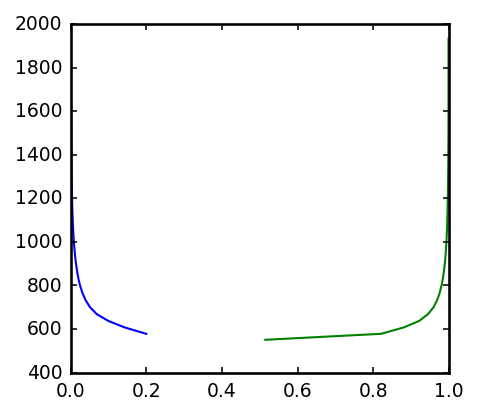

In [39]:
plt.plot(df.molfrac_bin_0_comp_0,-df.omega_bin_0)
plt.plot(df.molfrac_bin_1_comp_0,-df.omega_bin_1)

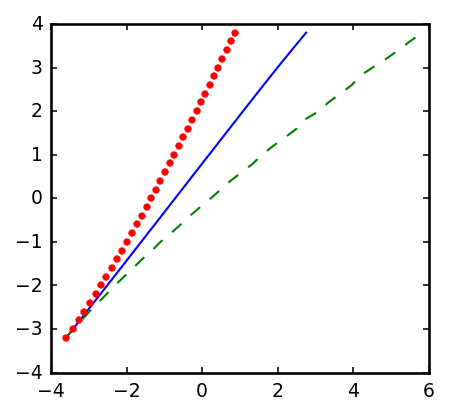

In [14]:

plt.plot(df.mu_bin_0_comp_0,df.mu_bin_0_comp_1)
plt.plot(df.mu_spin_0_comp_0,df.mu_spin_0_comp_1,'--')
plt.plot(df.mu_spin_1_comp_0,df.mu_spin_1_comp_1,'.')

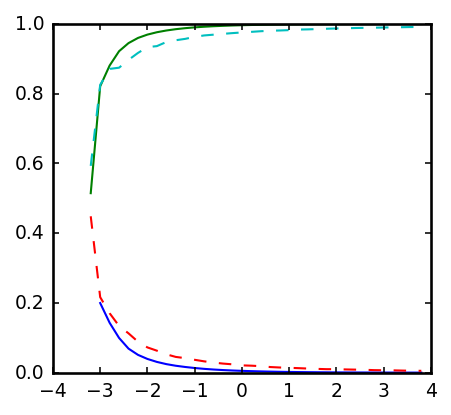

In [40]:
plt.plot(df.mu_bin_0_comp_1,df.molfrac_bin_0_comp_0)
plt.plot(df.mu_bin_1_comp_1,df.molfrac_bin_1_comp_0)

plt.plot(df.mu_spin_0_comp_1,df.molfrac_spin_0_comp_0,'--')
plt.plot(df.mu_spin_1_comp_1,df.molfrac_spin_1_comp_0,'--')

(-0.05, 0.1)

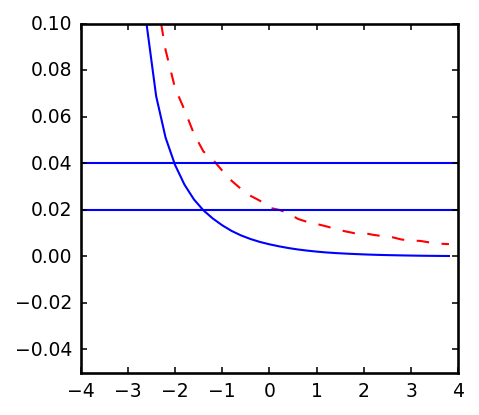

In [16]:
plt.plot(df.mu_bin_0_comp_1,df.molfrac_bin_0_comp_0)
plt.plot(df.mu_bin_1_comp_1,df.molfrac_bin_1_comp_0)

plt.plot(df.mu_spin_0_comp_1,df.molfrac_spin_0_comp_0,'--')
plt.plot(df.mu_spin_1_comp_1,df.molfrac_spin_1_comp_0,'--')

ax = plt.gca()
ax.axhline(y=0.02)
ax.axhline(y=0.04)

ax.set_ylim(-0.05,0.1)